#Programming Material - AR and MA

## Prerequisites:
- Autoregressive (AR) model
- Moving Average (MA) model

## Learning Objective:
- Generate synthetic data for AR(p) and MA(q) processes using `statsmodels`
- Visualize PACF, ACF plots for AR(p) and MA(q) model and relate the orders with the plots
- Fit AR(p) and MA(q) model on synthetic data using `statsmodels` 

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from statsmodels.tsa.arima_process import ArmaProcess

# 1. Auto-regressive (AR) Model

## 1.1. Time Series Generation using AR process  
AR(2) model with parameters $\phi_1 = 0.5, \phi_2 = 0.46$.

>$X_t = 0.5 X_{t-1} + 0.46 X_t{t} + Z_{t}$



### Set Model Parameters

In [46]:
ar_params = np.array([0.5, 0.46]) # phi_1 = 0.5, phi_2 = 0.46
ma_params = np.array([]) # kept empty to generate an AR model

ar = np.r_[1, -ar_params] # stacking 1 allows to include lag 0 in AR parameters  
ma = np.r_[1, ma_params] # Z_t is given by this term

### Create AR Process and Generate Time Series

In [47]:
# build an AR process
ar_process = ArmaProcess(ar, ma) 

np.random.seed(9999)
# generate some samples of time series data using the AR model 
X = ar_process.generate_sample(nsample=2500) 

### Time Series Plot

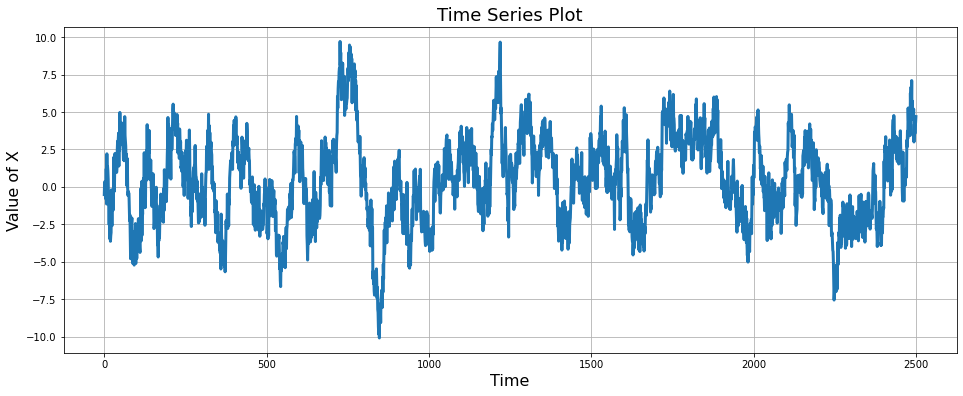

In [48]:
def plot_series(X, title='Time Series Plot', y_label='Value of X', figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    plt.plot(X, linewidth=3)
    plt.title(title, fontsize=18)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel(y_label, fontsize=16)
    plt.grid()
    plt.show()

plot_series(X)

### ACF and PACF plots

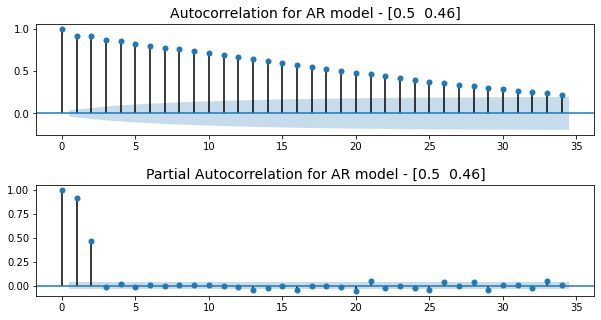

In [49]:
def plot_graphs(ar_params, X=None, figsize=(10, 5)):
    title = 'Autocorrelation for AR model - {}'.format(str(ar_params))

    if X is None:
        X = ArmaProcess(
            ar=np.r_[1, -ar_params], ma=[1]
        ).generate_sample(nsample=10000) 

    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.45)
        
    ax = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(X, ax=ax)
    ax.set_title(title, fontsize=14)
    
    ax = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(X, ax=ax)
    ax.set_title('Partial ' + title, fontsize=14)

    plt.show()

plot_graphs(ar_params, X)

#### **Observation**

For AR(2) process, PACF values appear to cut-off after lag 2, whereas the ACF values tail off. **Does the PACF plot for the AR model have some link with the order of the model?**

## 1.2. Relation between Order and PACF plot for AR model

Let's explore with two AR models of orders 3 and 4 given below.

>$
X_t = 0.4 X_{t-1} + 0.35 X_{t-2} + 0.2 X_{t-3} + Z_t
\\
X_t = 0.31 X_{t-1} + 0.3 X_{t-2} + 0.2 X_{t-3} + 0.15 X_{t-4} + Z_t
$

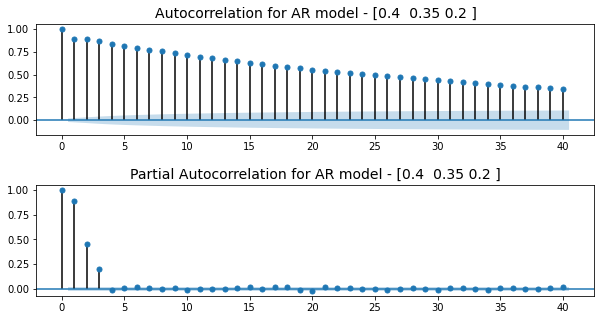

In [50]:
ar_params1 = np.array([0.4, 0.35, 0.2]) 
plot_graphs(ar_params1)

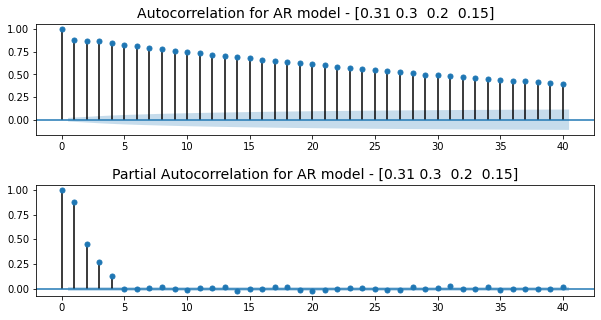

In [51]:
ar_params2 = np.array([0.31, 0.3, 0.2, 0.15]) 
plot_graphs(ar_params2)

### **Observation**

**PACF values for AR(p) model drop abruptly after the first p lags whereas the ACF values tail off**. 

## 1.3. Fitting AR(p) model

### Create Synthetic Data

>$X_t = 0.5 X_{t-1} + 0.46 X_t{t} + Z_{t}$

In [52]:
X = ArmaProcess(
    ar=[1, -0.5, -0.46], ma=[1]
).generate_sample(nsample=1000)

### Fit Model

In [9]:
ar_order = 2   # 2 order for ar_part
ma_order = 0   # 0 order for ma_part
order = (ar_order, ma_order)

ar_model = sm.tsa.ARMA(X, order=order).fit(trend='nc')
ar_model.params

array([0.49687063, 0.47616107])

# 2. Moving Average (MA) Model 

## 2.1. Time Series Generation using MA process  


$\quad \quad X_t = Z_t + 0.9 Z_{t - 1}$

 

### Set Model Parameters

In [10]:
ar_params = np.array([]) # kept empty to generate an AR model
ma_params = np.array([0.9]) # theta_1 = 0.9 

ar = np.r_[1, -ar_params] # stacking 1 allows to include X_t term
ma = np.r_[1, ma_params] # stacking 1 allows to include lag 0 in MA parameters  

### Create MA Process and Generate Time Series

In [26]:
# build an MA process
ma_process = ArmaProcess(ar, ma) 

# generate some samples of time series data using the MA process 
X = ma_process.generate_sample(nsample=2500) 

### Time Series Plot

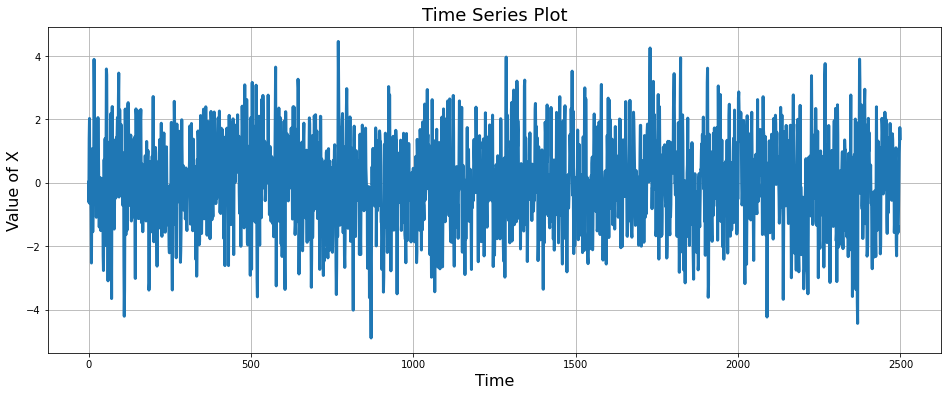

In [27]:
plot_series(X)

### ACF and PACF plots

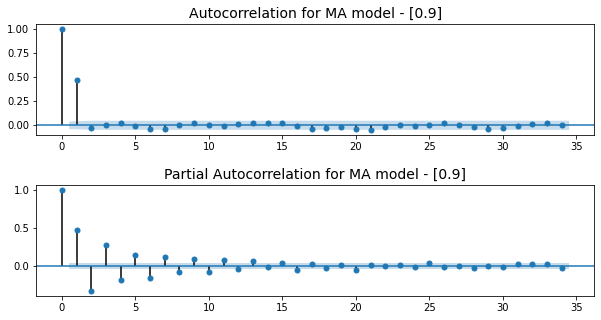

In [28]:
def plot_graphs( ma_params=None, X=None, figsize=(10, 5)):
    title = 'Autocorrelation for MA model - {}'.format(str(ma_params))
    
    if X is None:
        ma = np.r_[1, ma_params] 
        X = ArmaProcess(
            ar=[1], ma=ma
        ).generate_sample(nsample=10000) 

    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.45)
    
    ax = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(X, ax=ax)
    ax.set_title(title, fontsize=14)
    
    ax = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(X, ax=ax)
    ax.set_title('Partial ' + title, fontsize=14)
    
    plt.show()

plot_graphs(X=X, ma_params=ma_params)

#### Observation

ACF values drop abruptly to about zero after lag one whereas the PACF values drop gradually. **Does the ACF plot for the MA model have some link with the order of the model?**. Let's explore.

## 2.2. Relation between order and ACF plot for MA model

Let's explore with two MA models with order 2 and 3.

$
\quad \quad
{
    X_t = Z_t + 0.9 Z_{t-1} + 0.8 Z_{t-2} \\
    X_t = Z_t + 0.9 Z_{t-1} + 0.8 Z_{t-2} + 0.7 Z_{t-3}
}$

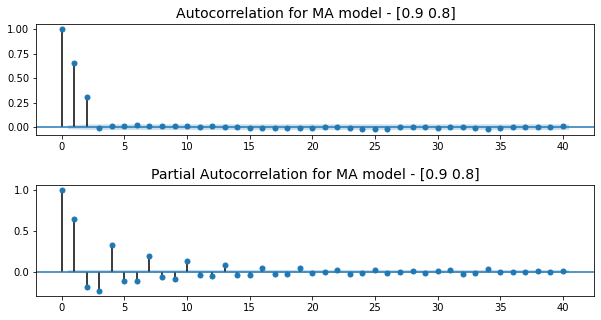

In [16]:
ma_params1 = np.array([0.9, 0.8]) 
plot_graphs(ma_params1)

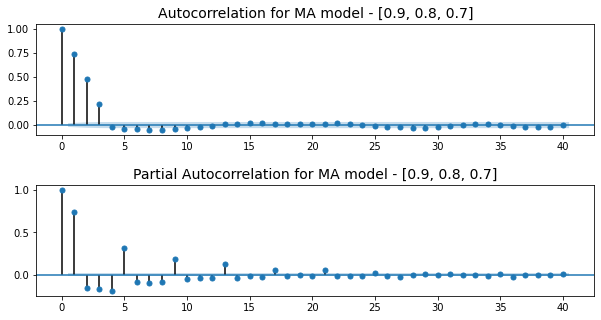

In [17]:
ma_params2 = [0.9, 0.8, 0.7]
plot_graphs(ma_params2)

### **Observation**

ACF values for MA(q) model drop abruptly to zero after the q lags wheras PACF values tail off.

## 2.3. Fitting MA(q) model



### Create Synthetic Data

> $X_t = Z_{t} + 0.5 Z_{t-1} + 0.3 Z_t{t}$

In [18]:
X = ArmaProcess(
    ar=[1], ma=[1, 0.5, 0.3]
).generate_sample(nsample=10000)

### Fit Model

In [19]:
ar_order = 0 # fitting dataset from MA(2) process so order is 0 for ar_part
ma_order = 2 # fitting dataset from MA(2) process so order is 2 for ma_part
order = (ar_order, ma_order)

ma_model = sm.tsa.ARMA(X, order=order).fit(trend='nc', disp=-1)

ma_model.params

array([0.51105991, 0.298689  ])

# Conclusions

1. For an AR(p) model, the PACF values cut off after lag p, whereas the ACF values tail off.

2. For an MA(q) models, the PACF values tail off, whereas the ACF values cut off after lag p.

3. If the ACF and PACF plots  follow the pattern discussed in 1 or 2, AR or MA models can be fitted accordingly using `statsmodels` functions.